### Does the market category of a car (e.g., luxury, performance) influence its price?


In [207]:
import seaborn as sns
import numpy as np
import pandas as pd

In [208]:
df = pd.read_csv('../01_what_is_machine_learning/cars_data.csv')

In [209]:
df.columns = ['brand','model','year','fuel','hp','cylinders','steering', 'driven_wheels','doors',
              'market_cat','size','style','hiway_mpg','city_mpg','popularity','price']

In [210]:
df.shape

(11914, 16)

In [211]:
df['price'].min(),df['price'].max()

(2000, 2065902)

In [212]:
df['market_cat'].value_counts()

market_cat
Crossover                                          1110
Flex Fuel                                           872
Luxury                                              855
Luxury,Performance                                  673
Hatchback                                           641
                                                   ... 
Crossover,Exotic,Luxury,Performance                   1
Exotic,Luxury,High-Performance,Hybrid                 1
Crossover,Exotic,Luxury,High-Performance              1
Flex Fuel,Factory Tuner,Luxury,High-Performance       1
Performance,Hybrid                                    1
Name: count, Length: 71, dtype: int64

In [213]:
words = df['market_cat'].str.split(',').explode() #splits the strings in each row of the 'market_cat' column based on the comma (',') delimiter.
words.unique()

array(['Factory Tuner', 'Luxury', 'High-Performance', 'Performance',
       'Flex Fuel', nan, 'Hatchback', 'Hybrid', 'Diesel', 'Exotic',
       'Crossover'], dtype=object)

In [214]:
df.drop(['brand','model','year','fuel','hp','cylinders','steering', 'driven_wheels','doors','size','style','hiway_mpg','city_mpg','popularity'], axis=1, inplace=True)

In [215]:
df.dropna(inplace=True)

In [40]:
df

,market_cat,price
0,"[Factory Tuner, Luxury, High-Performance]",46135
1,"[Luxury, Performance]",40650
2,"[Luxury, High-Performance]",36350
3,"[Luxury, Performance]",29450
4,[Luxury],34500
...,...,...
11909,"[Crossover, Hatchback, Luxury]",46120
11910,"[Crossover, Hatchback, Luxury]",56670
11911,"[Crossover, Hatchback, Luxury]",50620
11912,"[Crossover, Hatchback, Luxury]",50920


In [41]:
df['market_cat'].isnull().sum()

0

In [42]:
from sklearn.preprocessing import MultiLabelBinarizer # transforming lists of labels or tags into a binary format 

In [44]:
mlb = MultiLabelBinarizer()

In [45]:
encoded_market_cat = mlb.fit_transform(df['market_cat'])

In [49]:
encoded_market_cat_df = pd.DataFrame(encoded_market_cat, columns=mlb.classes_)

In [55]:
encoded_market_cat_df.reset_index()
encoded_market_cat_df.columns = ['crossover','diesel','exotic','factory_tuner','flex_fuel','hatchback','high_perf','hybrid','lux','perf']
encoded_market_cat_df

,crossover,diesel,exotic,factory_tuner,flex_fuel,hatchback,high_perf,hybrid,lux,perf
0,0,0,0,1,0,0,1,0,1,0
1,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
8167,1,0,0,0,0,1,0,0,1,0
8168,1,0,0,0,0,1,0,0,1,0
8169,1,0,0,0,0,1,0,0,1,0
8170,1,0,0,0,0,1,0,0,1,0


In [66]:
df.reset_index(inplace=True)
df.drop(['level_0','index','market_cat'],axis = 1,inplace=True)

In [67]:
df

,price
0,46135
1,40650
2,36350
3,29450
4,34500
...,...
8167,46120
8168,56670
8169,50620
8170,50920


In [68]:
df_encoded = pd.concat([encoded_market_cat_df,df],axis=1)

In [69]:
df_encoded

,crossover,diesel,exotic,factory_tuner,flex_fuel,hatchback,high_perf,hybrid,lux,perf,price
0,0,0,0,1,0,0,1,0,1,0,46135
1,0,0,0,0,0,0,0,0,1,1,40650
2,0,0,0,0,0,0,1,0,1,0,36350
3,0,0,0,0,0,0,0,0,1,1,29450
4,0,0,0,0,0,0,0,0,1,0,34500
...,...,...,...,...,...,...,...,...,...,...,...
8167,1,0,0,0,0,1,0,0,1,0,46120
8168,1,0,0,0,0,1,0,0,1,0,56670
8169,1,0,0,0,0,1,0,0,1,0,50620
8170,1,0,0,0,0,1,0,0,1,0,50920


In [70]:
df_encoded.corr()

,crossover,diesel,exotic,factory_tuner,flex_fuel,hatchback,high_perf,hybrid,lux,perf,price
crossover,1.000000,-0.018548,-0.144755,-0.121294,-0.169635,-0.167191,-0.233130,-0.025780,-0.098333,-0.199166,-0.110266
diesel,-0.018548,1.000000,-0.041097,-0.046117,-0.031293,-0.036184,-0.072707,-0.033864,0.003369,-0.094995,-0.023935
exotic,-0.144755,-0.041097,1.000000,0.098038,-0.071245,-0.106438,0.480987,-0.051287,0.007722,-0.092725,0.662571
factory_tuner,-0.121294,-0.046117,0.098038,1.000000,-0.100516,-0.054383,0.420228,-0.060390,0.100898,0.011974,0.140701
flex_fuel,-0.169635,-0.031293,-0.071245,-0.100516,1.000000,-0.165710,-0.133829,-0.080371,-0.240390,-0.142768,-0.052842
hatchback,-0.167191,-0.036184,-0.106438,-0.054383,-0.165710,1.000000,-0.176368,0.040533,-0.269311,0.016144,-0.178165
high_perf,-0.233130,-0.072707,0.480987,0.420228,-0.133829,-0.176368,1.000000,-0.074195,0.152190,-0.267086,0.457251
hybrid,-0.025780,-0.033864,-0.051287,-0.060390,-0.080371,0.040533,-0.074195,1.000000,-0.042839,-0.102224,-0.034173
lux,-0.098333,0.003369,0.007722,0.100898,-0.240390,-0.269311,0.152190,-0.042839,1.000000,0.060081,0.156026
perf,-0.199166,-0.094995,-0.092725,0.011974,-0.142768,0.016144,-0.267086,-0.102224,0.060081,1.000000,-0.057281


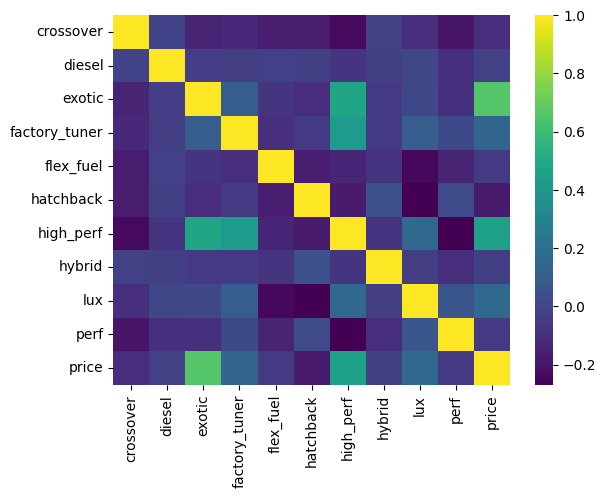

In [71]:
sns.heatmap(df_encoded.corr(),cmap='viridis', fmt='.0f');

In [217]:
#taking into my model: exotic, factory_tuner,high_perf, lux ## exotic = strikingly, excitingly, or mysteriously different or unusual

In [73]:
X = df_encoded[['exotic', 'factory_tuner','high_perf', 'lux']]

In [106]:
y = df_encoded['price']

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=69) 

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6537, 4), (1635, 4), (6537,), (1635,))

In [93]:
import matplotlib.pyplot as plt

In [89]:
from sklearn.linear_model import LinearRegression

In [97]:
mlin = LinearRegression()

In [98]:
mlin.fit(X_train, y_train)

LinearRegression()

In [110]:
#checking the r-square values:
mlin.score(X_train,y_train),mlin.score(X_test,y_test)

(0.49408115631073124, 0.4408030918083913)

In [112]:
#now predicting the prices
y_pred = mlin.predict(X_test)
y_pred

array([ 44806.32152085,  44806.32152085, 208536.81281216, ...,
        44806.32152085,  77622.05984338, 238330.19650671])

In [130]:
#now preparing to concat
y_pred_df = pd.DataFrame(y_pred, columns=['price_pred'])
y_test_df = pd.DataFrame(y_test,columns=['price'])
y_test_df.reset_index(inplace=True)
y_test_df.drop('index', axis=1, inplace=True)

In [132]:
y_pred_df

,price_pred
0,44806.321521
1,44806.321521
2,208536.812812
3,27355.007725
4,27355.007725
...,...
1630,74599.705215
1631,27355.007725
1632,44806.321521
1633,77622.059843


In [133]:
y_test_df

,price
0,2149
1,49995
2,474600
3,35595
4,28295
...,...
1630,125600
1631,35675
1632,37400
1633,47400


In [134]:
pred = pd.concat([y_test_df,y_pred_df],axis=1)
pred

,price,price_pred
0,2149,44806.321521
1,49995,44806.321521
2,474600,208536.812812
3,35595,27355.007725
4,28295,27355.007725
...,...,...
1630,125600,74599.705215
1631,35675,27355.007725
1632,37400,44806.321521
1633,47400,77622.059843


In [ ]:
pred

In [136]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [137]:
MAE = mean_absolute_error(
    y_test, # actual values
    y_pred # predicted values
)
MAE.round(2)

20215.86

In [139]:
MSE = mean_squared_error(
    y_test, # actual values
    y_pred # predicted values
)
MSE.round(2)

3880642190.38

In [147]:
a = y_test_df
b = y_pred_df

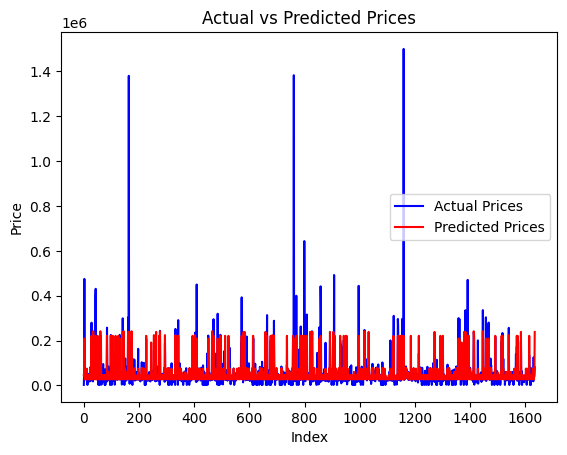

In [157]:
plt.plot(a, label='Actual Prices', color='blue')
plt.plot(b, label='Predicted Prices', color='red')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend();

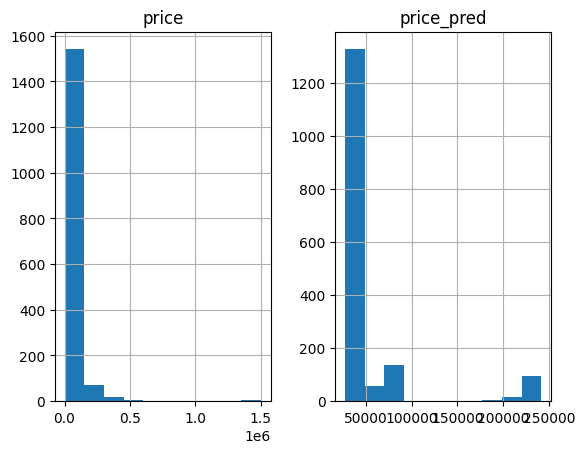

In [199]:
pred.hist();
#plt.legend()

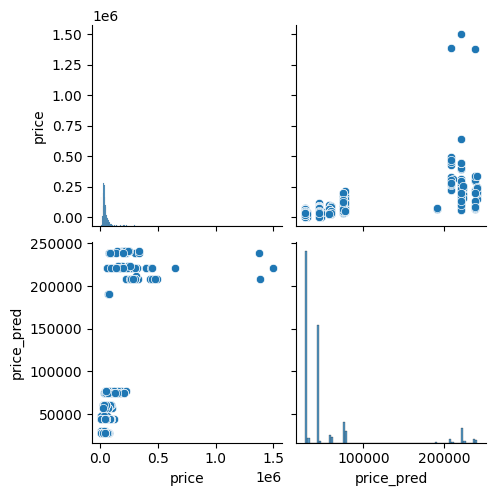

In [205]:
sns.pairplot(pred);

### Improvements:
- outliers
- scaling
- adding other variables
- numbers in 1k
- more readable plots
- imputing missing values*

### here just playing with filtering to google the exotic cars, not part of the presentation

In [158]:
df_exotic = pd.read_csv('../01_what_is_machine_learning/cars_data.csv')
df_exotic

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [169]:
df_exotic.dropna(subset=['Market Category'], inplace=True)

In [171]:
df_exotic_filtered = df_exotic[df_exotic['Market Category'].str.contains('exotic', case=False)]

In [173]:
df_exotic_filtered.reset_index(inplace=True)

In [176]:
df_exotic_filtered['Make'].value_counts()

Make
Aston Martin     93
Bentley          74
Ferrari          69
Maserati         58
Lamborghini      52
Rolls-Royce      31
Lotus            29
Mercedes-Benz    18
Tesla            18
Dodge            18
Maybach          16
McLaren           5
Acura             5
BMW               4
Spyker            3
Bugatti           3
Porsche           2
Ford              2
Lexus             1
Name: count, dtype: int64

In [191]:
df_aston = (df_exotic_filtered['Make'] == 'Maserati')
df_aston.loc[df_aston]

150    True
151    True
152    True
153    True
154    True
155    True
268    True
269    True
270    True
271    True
272    True
273    True
274    True
275    True
286    True
287    True
288    True
289    True
290    True
291    True
292    True
293    True
294    True
295    True
296    True
297    True
298    True
299    True
300    True
301    True
302    True
303    True
304    True
305    True
306    True
307    True
308    True
317    True
318    True
374    True
375    True
376    True
377    True
378    True
379    True
380    True
381    True
382    True
383    True
384    True
385    True
386    True
410    True
411    True
412    True
413    True
414    True
415    True
Name: Make, dtype: bool

In [192]:
df_exotic_filtered.loc[151]

index                                          3031
Make                                       Maserati
Model                                         Coupe
Year                                           2004
Engine Fuel Type        premium unleaded (required)
Engine HP                                     390.0
Engine Cylinders                                8.0
Transmission Type                  AUTOMATED_MANUAL
Driven_Wheels                      rear wheel drive
Number of Doors                                 2.0
Market Category      Exotic,Luxury,High-Performance
Vehicle Size                                Compact
Vehicle Style                                 Coupe
highway MPG                                      16
city mpg                                         10
Popularity                                      238
MSRP                                          85174
Name: 151, dtype: object